# Требуется:

* Отобрать записи, соответствующие странам с минимум 30 респонеднтами в выборке
* Получить zero-crossing-rate по каждой из записей
* Провести ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15. Дискретность признака zero-crossing-rate игнорировать.


In [34]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('speakers_all.csv')
data.head(35)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN
5,43.0,41.0,"port-au-prince, haiti",haitian,haitian,male,1167,haiti,True,NaN,NaN,NaN
6,21.0,21.0,"port-au-prince, haiti",haitian,haitian,male,1168,haiti,True,NaN,NaN,NaN
7,54.0,51.0,"port-au-prince, haiti",haitian,haitian,female,1169,haiti,True,NaN,NaN,NaN
8,18.0,16.0,"ouanaminthe, haiti",haitian,haitian,female,1866,haiti,True,NaN,NaN,NaN
9,73.0,5.0,"pepeekeo, hawai'i, usa",hawai'i,hawai'i,male,1675,usa,True,NaN,NaN,NaN


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 12 columns):
age                2172 non-null float64
age_onset          2172 non-null float64
birthplace         2168 non-null object
filename           2172 non-null object
native_language    2172 non-null object
sex                2172 non-null object
speakerid          2172 non-null int64
country            2167 non-null object
file_missing?      2172 non-null bool
Unnamed: 9         0 non-null float64
Unnamed: 10        0 non-null float64
Unnamed: 11        1 non-null object
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 188.9+ KB


Видим, что последние три столбца не несут никакой информации.

In [37]:
data_preprocessed = data[data['file_missing?'] == False]
data_preprocessed = data_preprocessed.drop(data_preprocessed.columns[-4:], axis=1)
data_preprocessed.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa


In [38]:
summ = 0
counter = data_preprocessed.groupby('country')['country'].count()
counter_good = []
for s in counter.index:
    if counter[s] >= 30:
        counter_good.append(s)
        summ += counter[s]
        
print(counter)
print(counter_good)
print('суммарно приходится ',summ,' добровольцев')

country
afghanistan                17
albania                     5
algeria                     4
andorra                     1
angola                      5
antigua and barbuda         1
argentina                   9
armenia                     4
australia                  33
austria                     9
azerbaijan                  3
bahrain                     1
bangladesh                 14
barbados                    1
belarus                     6
belgium                    36
belize                      2
benin                       1
bolivia                    16
bosnia                      1
bosnia and herzegovina     14
botswana                    3
brazil                     39
bulgaria                   19
burkina faso                2
burundi                     1
cambodia                    6
cameroon                    9
canada                     54
chad                        1
                         ... 
sweden                     17
switzerland                 6
sy

In [39]:
l = []
for s in data_preprocessed['country'].values:
    if s in counter_good:
        l.append(True)
    else:
        l.append(False)

In [40]:
data_preprocessed = data_preprocessed[l]
data_preprocessed.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
50,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia
51,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia
52,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia
53,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia
54,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia


На этом наша предобработка данных заканчивается, можно приступать ко второй части - получение zero-crossing rate по каждой из отобранных записей.

Для удобства проверки и дальнейшего использования договоримся, что $.mp3$-файлы находятся в папке $recordings$, расположенной в одном репозитории с данным ноутбуком.

In [41]:
import librosa
import IPython.display as ipd
import os

Попробуем загрузить какой-нибудь файл и визуализировать дорожку (волна + спектр)

In [42]:
audio_path = os.getcwd()+'/recordings/afrikaans5.mp3'
#ipd.Audio(audio_path)

In [43]:
x , sr = librosa.load(audio_path)

С предыдущим блоком были проблемы, решение на ubuntu - $sudo$ $apt$-$get$ $install$ $ffmpeg$

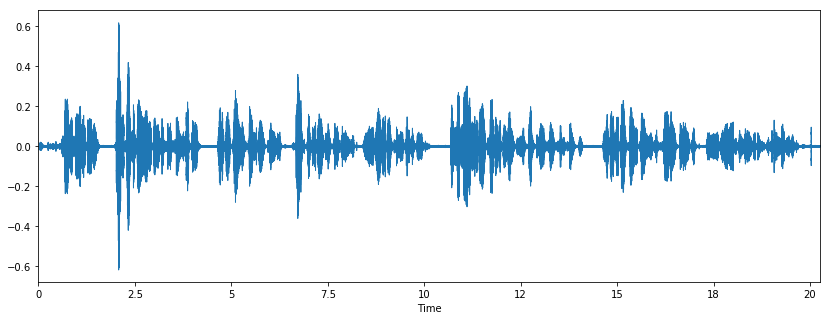

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

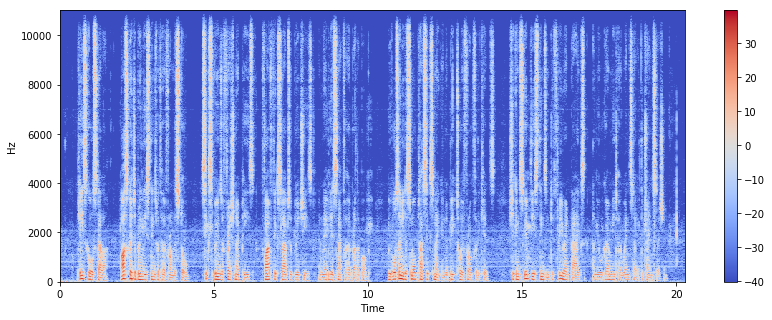

In [49]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

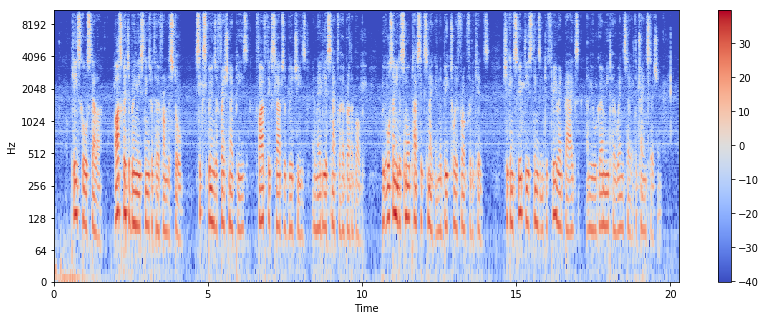

In [50]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Теперь приступим непосредственно к извлечению признаков,а именно, найдем $zero$-$crossing$-$rate$ (количество смен знака звукового сигнала) для всех отобранных записей:

Визуализируем для рассмотренного выше примера

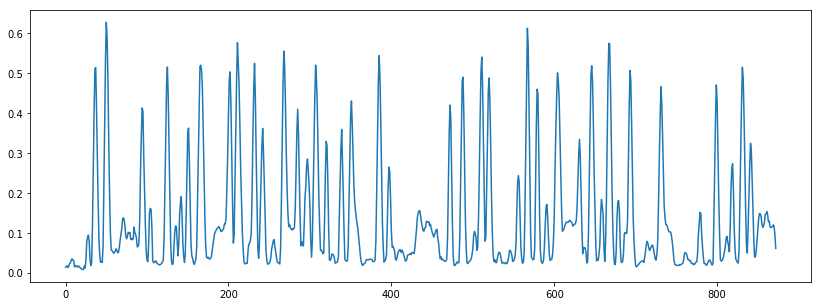

In [55]:
plt.figure(figsize=(14, 5))
zcr = librosa.feature.zero_crossing_rate(x)
plt.plot(zcr[0])

$cell$ ниже опасно включать больше 1 раза (занимает очень много времени и мощности) (то, что закоментированно, не надо включать - на всякий случай оставил)

In [63]:
#data_shape = data_preprocessed.shape
#zcr_dict = {}
#for file in data_preprocessed['filename']:
    #audio_path = os.getcwd()+'/recordings/'+file+'.mp3'
    #x , sr = librosa.load(audio_path)
    #zcr_dict.update({file:librosa.feature.zero_crossing_rate(x)[0]})

In [84]:
#zc_dict = {}
#for file in data_preprocessed['filename']:
#    audio_path = os.getcwd()+'/recordings/'+file+'.mp3'
#    x , sr = librosa.load(audio_path)
#    z = librosa.zero_crossings(x)
#    s = z.shape[0]
#    zc_dict.update({file:z.sum()/float(s)})

In [83]:
#audio_path = os.getcwd()+'/recordings/afrikaans5.mp3'
#x , sr = librosa.load(audio_path)
#librosa.zero_crossings(x).shape
#x

array([ 1.3485745e-05,  9.3057788e-06, -1.7221806e-05, ...,
        2.5578670e-04,  1.2898848e-03,  0.0000000e+00], dtype=float32)

In [85]:
#zc_dict

{'amharic1': 0.08042135946798672,
 'amharic10': 0.06951412079360522,
 'amharic11': 0.13097682628753252,
 'amharic12': 0.11156888167996414,
 'amharic13': 0.14418225136988777,
 'amharic14': 0.08555686903656168,
 'amharic15': 0.08707766052157297,
 'amharic16': 0.13566587092820734,
 'amharic17': 0.151444355781476,
 'amharic18': 0.15443302110393053,
 'amharic19': 0.1783425593577374,
 'amharic2': 0.10532022892583646,
 'amharic20': 0.1708887206023669,
 'amharic3': 0.08458779321339102,
 'amharic4': 0.26495934740190397,
 'amharic5': 0.2405343585750438,
 'amharic6': 0.17864897798381998,
 'amharic7': 0.10827588935710793,
 'amharic8': 0.22216805185738642,
 'amharic9': 0.07350914608693201,
 'arabic1': 0.09885902717894669,
 'arabic102': 0.13566317850234227,
 'arabic30': 0.12425582845611276,
 'arabic35': 0.10904473889368914,
 'arabic36': 0.11612261798323267,
 'arabic37': 0.11735707324551319,
 'arabic38': 0.12950905712299815,
 'arabic39': 0.10414620013867448,
 'arabic40': 0.10416053874138866,
 'arabic

In [90]:
arr = np.zeros(data_preprocessed.shape[0])
i = 0
for file in data_preprocessed['filename']:
    audio_path = os.getcwd()+'/recordings/'+file+'.mp3'
    x , sr = librosa.load(audio_path)
    arr[i] = librosa.zero_crossings(x).sum()
    i += 1

In [1]:
data_aggregated = data_preprocessed.assign(zero_crossing_rate = arr)
data_aggregated.head()

NameError: name 'data_preprocessed' is not defined

In [95]:
data_aggregated.to_csv('data_mid.csv', index=False)